In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_e = pd.read_csv("Enrollment Master Data_2015_E.csv")
df_s = pd.read_csv("Enrollment Master Data_2015_S.csv")
df_schools = pd.read_csv("Masterlist of Schools.csv")
df_mooe = pd.read_csv("MOOE data.csv")
df_rooms = pd.read_csv("Rooms data.csv")
df_locations = pd.read_csv("Schools Location Data.csv", encoding='latin1')
df_teachers = pd.read_csv("Teachers data.csv")

In [3]:
df_e

,School ID,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female
0,100001.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0
1,100002.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0
2,100003.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0
3,100004.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0
4,100005.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38644,227003.0,67.0,70.0,105.0,76.0,97.0,64.0,92.0,75.0,85.0,80.0,80.0,65.0,78.0,73.0,0.0,0.0
38645,228001.0,179.0,145.0,201.0,143.0,194.0,163.0,188.0,164.0,164.0,167.0,118.0,138.0,110.0,122.0,0.0,0.0
38646,228501.0,317.0,315.0,383.0,382.0,444.0,394.0,456.0,341.0,445.0,431.0,427.0,422.0,418.0,426.0,0.0,0.0
38647,228502.0,66.0,78.0,110.0,84.0,113.0,87.0,91.0,74.0,98.0,69.0,80.0,80.0,75.0,70.0,0.0,0.0


In [4]:
df_e.isna().sum()

School ID         1
Kinder Male       1
Kinder Female     1
Grade 1 Male      1
Grade 1 Female    1
Grade 2 Male      1
Grade 2 Female    1
Grade 3 Male      1
Grade 3 Female    1
Grade 4 Male      1
Grade 4 Female    1
Grade 5 Male      1
Grade 5 Female    1
Grade 6 Male      1
Grade 6 Female    1
SPED NG Male      1
SPED NG Female    1
dtype: int64

In [5]:
df_e.dropna(inplace=True)

In [6]:
df_e.dtypes

School ID         float64
Kinder Male       float64
Kinder Female     float64
Grade 1 Male      float64
Grade 1 Female    float64
Grade 2 Male      float64
Grade 2 Female    float64
Grade 3 Male      float64
Grade 3 Female    float64
Grade 4 Male      float64
Grade 4 Female    float64
Grade 5 Male      float64
Grade 5 Female    float64
Grade 6 Male      float64
Grade 6 Female    float64
SPED NG Male      float64
SPED NG Female    float64
dtype: object

In [7]:
df_s.isna().sum()

School ID          1
Grade 7 Male       1
Grade 7 Female     1
Grade 8 Male       1
Grade 8 Female     1
Grade 9 Male       1
Grade 9 Female     1
Grade 10 Male      1
Grade 10 Female    1
Grade 11 Male      1
Grade 11 Female    1
Grade 12 Male      1
Grade 12 Female    1
SPED NG Male       1
SPED NG Female     1
dtype: int64

In [8]:
df_s.dropna(inplace=True)

In [9]:
df_s.dtypes

School ID          float64
Grade 7 Male        object
Grade 7 Female      object
Grade 8 Male        object
Grade 8 Female      object
Grade 9 Male        object
Grade 9 Female      object
Grade 10 Male       object
Grade 10 Female     object
Grade 11 Male      float64
Grade 11 Female    float64
Grade 12 Male      float64
Grade 12 Female    float64
SPED NG Male       float64
SPED NG Female     float64
dtype: object

In [10]:
df_s['Grade 7 Male']

0        20
1       240
2        89
3        38
4        78
       ... 
7971     49
7972    406
7973    252
7974    118
7975    135
Name: Grade 7 Male, Length: 7976, dtype: object

In [11]:
df_s['Grade 7 Male'] = df_s['Grade 7 Male'].str.replace(',', '').astype(float)
df_s['Grade 7 Female'] = df_s['Grade 7 Female'].str.replace(',', '').astype(float)
df_s['Grade 8 Male'] = df_s['Grade 8 Male'].str.replace(',', '').astype(float)
df_s['Grade 8 Female'] = df_s['Grade 8 Female'].str.replace(',', '').astype(float)
df_s['Grade 9 Male'] = df_s['Grade 9 Male'].str.replace(',', '').astype(float)
df_s['Grade 9 Female'] = df_s['Grade 9 Female'].str.replace(',', '').astype(float)
df_s['Grade 10 Male'] = df_s['Grade 10 Male'].str.replace(',', '').astype(float)
df_s['Grade 10 Female'] = df_s['Grade 10 Female'].str.replace(',', '').astype(float)

In [12]:
df_s.dtypes

School ID          float64
Grade 7 Male       float64
Grade 7 Female     float64
Grade 8 Male       float64
Grade 8 Female     float64
Grade 9 Male       float64
Grade 9 Female     float64
Grade 10 Male      float64
Grade 10 Female    float64
Grade 11 Male      float64
Grade 11 Female    float64
Grade 12 Male      float64
Grade 12 Female    float64
SPED NG Male       float64
SPED NG Female     float64
dtype: object

In [13]:
df_schools.dtypes

school.id                   int64
school.name                object
school.region              object
school.region.name         object
school.province            object
school.cityhall            object
school.division            object
school.citymuni            object
school.district            object
school.legdistrict         object
school.type                object
school.abbrev              object
school.previousname        object
school.mother.id          float64
school.address             object
school.established         object
school.classification      object
school.classification2     object
school.curricularclass     object
school.organization        object
school.cityincome          object
school.cityclass           object
school.urban               object
dtype: object

In [14]:
df_schools.isna().sum()

school.id                     0
school.name                   0
school.region                 0
school.region.name            0
school.province               0
school.cityhall               1
school.division               0
school.citymuni               0
school.district               0
school.legdistrict            0
school.type                   0
school.abbrev             28436
school.previousname        4382
school.mother.id              7
school.address             1982
school.established            9
school.classification         0
school.classification2        0
school.curricularclass        0
school.organization           0
school.cityincome           976
school.cityclass          38390
school.urban                  3
dtype: int64

In [15]:
df_schools['school.cityhall'] = df_schools['school.cityhall'].replace(np.nan, 'Undefined')
df_schools['school.abbrev'] = df_schools['school.abbrev'].replace(np.nan, 'None')
df_schools['school.previousname'] = df_schools['school.previousname'].replace(np.nan, 'None')
df_schools['school.mother.id'] = df_schools['school.mother.id'].replace(np.nan, 'None')
df_schools['school.address'] = df_schools['school.address'].replace(np.nan, 'Undefined')
df_schools['school.established'] = df_schools['school.established'].replace(np.nan, 'None')
df_schools['school.cityincome'] = df_schools['school.cityincome'].replace(np.nan, 'Undefined')
df_schools['school.cityclass'] = df_schools['school.cityclass'].replace(np.nan, 'Undefined')
df_schools['school.urban'] = df_schools['school.urban'].replace(np.nan, 'Undefined')

In [16]:
df_schools.dtypes

school.id                  int64
school.name               object
school.region             object
school.region.name        object
school.province           object
school.cityhall           object
school.division           object
school.citymuni           object
school.district           object
school.legdistrict        object
school.type               object
school.abbrev             object
school.previousname       object
school.mother.id          object
school.address            object
school.established        object
school.classification     object
school.classification2    object
school.curricularclass    object
school.organization       object
school.cityincome         object
school.cityclass          object
school.urban              object
dtype: object

In [17]:
df_schools.isna().sum()

school.id                 0
school.name               0
school.region             0
school.region.name        0
school.province           0
school.cityhall           0
school.division           0
school.citymuni           0
school.district           0
school.legdistrict        0
school.type               0
school.abbrev             0
school.previousname       0
school.mother.id          0
school.address            0
school.established        0
school.classification     0
school.classification2    0
school.curricularclass    0
school.organization       0
school.cityincome         0
school.cityclass          0
school.urban              0
dtype: int64

In [18]:
df_mooe

,school.id,school.name,school.enrollment,school.offering,school.mooe
0,305075,Abra HS,2481,Secondary,"2,182,000.00"
1,134966,Agtangao ES,376,Elementary,"227,000.00"
2,134967,Bacsil ES,218,Elementary,"144,000.00"
3,134968,Bangued East CS,443,Elementary,"339,000.00"
4,134969,Bangued North ES,307,Elementary,"178,000.00"
...,...,...,...,...,...
44023,131231,J. Hector Lacson ES,340,Elementary,"180,000.00"
44024,131233,Kalandagan ES,420,Elementary,"248,000.00"
44025,131236,Ma. Z. Bayya ES,481,Elementary,"242,000.00"
44026,131237,New Isabela Central Elementary School,1895,Elementary,"841,000.00"


In [19]:
df_mooe.isna().sum()

school.id            0
school.name          0
school.enrollment    0
school.offering      0
 school.mooe         0
dtype: int64

In [20]:
df_mooe.dtypes

school.id             int64
school.name          object
school.enrollment     int64
school.offering      object
 school.mooe         object
dtype: object

In [21]:
df_mooe = df_mooe.rename(columns={' school.mooe ':'school.mooe'})
df_mooe.dtypes

school.id             int64
school.name          object
school.enrollment     int64
school.offering      object
school.mooe          object
dtype: object

In [22]:
df_mooe['school.mooe']

0         2,182,000.00 
1           227,000.00 
2           144,000.00 
3           339,000.00 
4           178,000.00 
              ...      
44023       180,000.00 
44024       248,000.00 
44025       242,000.00 
44026       841,000.00 
44027     2,345,000.00 
Name: school.mooe, Length: 44028, dtype: object

In [23]:
df_mooe['school.mooe'] = df_mooe['school.mooe'].str.replace(',', '').astype(float)

In [24]:
df_mooe['school.mooe']

0        2182000.0
1         227000.0
2         144000.0
3         339000.0
4         178000.0
           ...    
44023     180000.0
44024     248000.0
44025     242000.0
44026     841000.0
44027    2345000.0
Name: school.mooe, Length: 44028, dtype: float64

In [25]:
df_rooms.isna().sum()

School ID                     0
rooms.standard.academic       0
rooms.standard.unused         0
rooms.nonstandard.academic    4
rooms.nonstandard.unused      4
dtype: int64

In [26]:
df_rooms.dtypes

School ID                       int64
rooms.standard.academic         int64
rooms.standard.unused           int64
rooms.nonstandard.academic    float64
rooms.nonstandard.unused      float64
dtype: object

In [27]:
df_rooms['rooms.nonstandard.academic']  = df_rooms['rooms.nonstandard.academic'].replace(np.nan, 0).astype('int64')
df_rooms['rooms.nonstandard.unused']  = df_rooms['rooms.nonstandard.unused'].replace(np.nan, 0).astype('int64')

In [28]:
df_rooms.isna().sum()

School ID                     0
rooms.standard.academic       0
rooms.standard.unused         0
rooms.nonstandard.academic    0
rooms.nonstandard.unused      0
dtype: int64

In [29]:
df_rooms.dtypes

School ID                     int64
rooms.standard.academic       int64
rooms.standard.unused         int64
rooms.nonstandard.academic    int64
rooms.nonstandard.unused      int64
dtype: object

In [30]:
df_locations.isna().sum()

School ID             0
School Name           0
Region                0
Province              0
Municipality          0
Division              0
District              0
Offering              0
Name of Principal    11
Enrolment             0
Latitude              3
Longitude             3
dtype: int64

In [31]:
df_locations.dtypes

School ID              int64
School Name           object
Region                object
Province              object
Municipality          object
Division              object
District              object
Offering              object
Name of Principal     object
Enrolment              int64
Latitude             float64
Longitude            float64
dtype: object

In [32]:
df_locations['Name of Principal'] = df_locations['Name of Principal'].replace(np.nan, 'Undefined')

In [33]:
df_locations.isna().sum()

School ID            0
School Name          0
Region               0
Province             0
Municipality         0
Division             0
District             0
Offering             0
Name of Principal    0
Enrolment            0
Latitude             3
Longitude            3
dtype: int64

In [34]:
df_locations.dtypes


School ID              int64
School Name           object
Region                object
Province              object
Municipality          object
Division              object
District              object
Offering              object
Name of Principal     object
Enrolment              int64
Latitude             float64
Longitude            float64
dtype: object

In [35]:
df_teachers.isna().sum()

school.id              0
teachers.instructor    0
teachers.mobile        0
teachers.regular       0
teachers.sped          0
dtype: int64

In [36]:
df_teachers.dtypes


school.id              int64
teachers.instructor    int64
teachers.mobile        int64
teachers.regular       int64
teachers.sped          int64
dtype: object

In [37]:
df_es = pd.merge(df_e, df_s, how='outer', on='School ID')
df_es

,School ID,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,...,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male_y,SPED NG Female_y
0,100001.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100003.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100004.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100005.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46619,320607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,46.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
46620,320701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,351.0,333.0,298.0,328.0,0.0,0.0,0.0,0.0,0.0,0.0
46621,320702.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,164.0,185.0,140.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0
46622,320703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_es_melt = df_es.melt(id_vars='School ID')
df_es_melt

,School ID,variable,value
0,100001.0,Kinder Male,9.0
1,100002.0,Kinder Male,41.0
2,100003.0,Kinder Male,8.0
3,100004.0,Kinder Male,8.0
4,100005.0,Kinder Male,4.0
...,...,...,...
1398715,320607.0,SPED NG Female_y,0.0
1398716,320701.0,SPED NG Female_y,0.0
1398717,320702.0,SPED NG Female_y,0.0
1398718,320703.0,SPED NG Female_y,0.0


In [39]:
df_es_melt =df_es_melt.rename(columns={'variable':'Grade level', 'value':'Number of students'})
df_es_melt

,School ID,Grade level,Number of students
0,100001.0,Kinder Male,9.0
1,100002.0,Kinder Male,41.0
2,100003.0,Kinder Male,8.0
3,100004.0,Kinder Male,8.0
4,100005.0,Kinder Male,4.0
...,...,...,...
1398715,320607.0,SPED NG Female_y,0.0
1398716,320701.0,SPED NG Female_y,0.0
1398717,320702.0,SPED NG Female_y,0.0
1398718,320703.0,SPED NG Female_y,0.0


In [40]:
df_schools.columns

Index(['school.id', 'school.name', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban'],
      dtype='object')

In [41]:
df_schools = df_schools.rename(columns={'school.id':'School ID'})
df_schools.columns

Index(['School ID', 'school.name', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban'],
      dtype='object')

In [42]:
df_es_melt_s = pd.merge(df_es_melt, df_schools, how='outer', on='School ID')
df_es_melt_s.columns

Index(['School ID', 'Grade level', 'Number of students', 'school.name',
       'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban'],
      dtype='object')

In [43]:
df_es_melt_s.isna().sum()

School ID                      0
Grade level                   74
Number of students        668762
school.name                 2850
school.region               2850
school.region.name          2850
school.province             2850
school.cityhall             2850
school.division             2850
school.citymuni             2850
school.district             2850
school.legdistrict          2850
school.type                 2850
school.abbrev               2850
school.previousname         2850
school.mother.id            2850
school.address              2850
school.established          2850
school.classification       2850
school.classification2      2850
school.curricularclass      2850
school.organization         2850
school.cityincome           2850
school.cityclass            2850
school.urban                2850
dtype: int64

In [44]:
df_mooe.columns

Index(['school.id', 'school.name', 'school.enrollment', 'school.offering',
       'school.mooe'],
      dtype='object')

In [45]:
df_mooe = df_mooe.rename(columns={'school.id':'School ID'})

In [46]:
df_mooe.columns

Index(['School ID', 'school.name', 'school.enrollment', 'school.offering',
       'school.mooe'],
      dtype='object')

In [47]:
df_es_melt_sm = pd.merge(df_es_melt_s, df_mooe, how='outer', on='School ID')
df_es_melt_sm.columns

Index(['School ID', 'Grade level', 'Number of students', 'school.name_x',
       'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'school.enrollment', 'school.offering', 'school.mooe'],
      dtype='object')

In [48]:
df_es_melt_sm

,School ID,Grade level,Number of students,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,...,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,school.name_y,school.enrollment,school.offering,school.mooe
0,100001.0,Kinder Male,9.0,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,...,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,Undefined,Partially Urban,Apaleng-Libtong ES,90.0,Elementary,84000.0
1,100001.0,Kinder Female,7.0,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,...,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,Undefined,Partially Urban,Apaleng-Libtong ES,90.0,Elementary,84000.0
2,100001.0,Grade 1 Male,7.0,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,...,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,Undefined,Partially Urban,Apaleng-Libtong ES,90.0,Elementary,84000.0
3,100001.0,Grade 1 Female,2.0,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,...,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,Undefined,Partially Urban,Apaleng-Libtong ES,90.0,Elementary,84000.0
4,100001.0,Grade 2 Male,7.0,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,...,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,Undefined,Partially Urban,Apaleng-Libtong ES,90.0,Elementary,84000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398789,133647.0,NaN,NaN,Upper Macaranon PS,ARMM,Autonomous Region in Muslim Mindanao,LANAO DEL SUR,LANAO DEL SUR,Lanao del Sur - IIA,BUTIG,...,DepED Managed,Elementary,Monograde,Below P 15 M,Undefined,Partially Urban,NaN,NaN,NaN,NaN
1398790,219011.0,NaN,NaN,Marcelo Cariaga Learning Center,CAR,Cordillera Administrative Region,APAYAO,APAYAO,Apayao,LUNA,...,DepED Managed,Elementary,Multigrade,P 35 M or more but less than P 45 M,Undefined,Partially Urban,NaN,NaN,NaN,NaN
1398791,900279.0,NaN,NaN,Quirino State University-Laboratory HS,Region II,Cagayan Valley,QUIRINO,QUIRINO,Quirino,DIFFUN,...,SUC Managed,Secondary,Monograde,P 45 M or more but less than P 55 M,Undefined,Partially Urban,NaN,NaN,NaN,NaN
1398792,321507.0,NaN,NaN,Antipolo City SPED Center,Region IV-A,CALABARZON,RIZAL,CITY OF ANTIPOLO,Antipolo City,CITY OF ANTIPOLO,...,DepED Managed,Integrated - Elem & Sec,Monograde,P 400 M or more,Component City,Urban,NaN,NaN,NaN,NaN


In [49]:
df_es_melt_sm = df_es_melt_sm.rename(columns={'Number of students':'Number of students per grade level'})
df_es_melt_sm = df_es_melt_sm.rename(columns={'school.enrollment':'Total enrollment per school'})
df_es_melt_sm.columns

Index(['School ID', 'Grade level', 'Number of students per grade level',
       'school.name_x', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'Total enrollment per school', 'school.offering', 'school.mooe'],
      dtype='object')

In [50]:
df_es_melt_sm.dtypes

School ID                             float64
Grade level                            object
Number of students per grade level    float64
school.name_x                          object
school.region                          object
school.region.name                     object
school.province                        object
school.cityhall                        object
school.division                        object
school.citymuni                        object
school.district                        object
school.legdistrict                     object
school.type                            object
school.abbrev                          object
school.previousname                    object
school.mother.id                       object
school.address                         object
school.established                     object
school.classification                  object
school.classification2                 object
school.curricularclass                 object
school.organization               

In [51]:
df_rooms.columns

Index(['School ID', 'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused'],
      dtype='object')

In [52]:
df_es_melt_smr = pd.merge(df_es_melt_sm, df_rooms, how='outer', on='School ID')
df_es_melt_smr.columns                    

Index(['School ID', 'Grade level', 'Number of students per grade level',
       'school.name_x', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'Total enrollment per school', 'school.offering', 'school.mooe',
       'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused'],
      dtype='object')

In [53]:
df_es_melt_smr.dtypes    

School ID                             float64
Grade level                            object
Number of students per grade level    float64
school.name_x                          object
school.region                          object
school.region.name                     object
school.province                        object
school.cityhall                        object
school.division                        object
school.citymuni                        object
school.district                        object
school.legdistrict                     object
school.type                            object
school.abbrev                          object
school.previousname                    object
school.mother.id                       object
school.address                         object
school.established                     object
school.classification                  object
school.classification2                 object
school.curricularclass                 object
school.organization               

In [54]:
df_locations.columns

Index(['School ID', 'School Name', 'Region', 'Province', 'Municipality',
       'Division', 'District', 'Offering', 'Name of Principal', 'Enrolment',
       'Latitude', 'Longitude'],
      dtype='object')

In [55]:
df_es_melt_smrl = pd.merge(df_es_melt_smr, df_locations, how='outer', on='School ID')
df_es_melt_smrl.columns

Index(['School ID', 'Grade level', 'Number of students per grade level',
       'school.name_x', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'Total enrollment per school', 'school.offering', 'school.mooe',
       'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused', 'School Name',
       'Region', 'Province', 'Municipality', 'Division', 'District',
       'Offering', 'Name of Principal', 'Enrolment', 'Latitude', 'Longitude'],
      dtype='object')

In [56]:
df_es_melt_smrl.dtypes


School ID                             float64
Grade level                            object
Number of students per grade level    float64
school.name_x                          object
school.region                          object
school.region.name                     object
school.province                        object
school.cityhall                        object
school.division                        object
school.citymuni                        object
school.district                        object
school.legdistrict                     object
school.type                            object
school.abbrev                          object
school.previousname                    object
school.mother.id                       object
school.address                         object
school.established                     object
school.classification                  object
school.classification2                 object
school.curricularclass                 object
school.organization               

In [57]:
df_teachers.columns

Index(['school.id', 'teachers.instructor', 'teachers.mobile',
       'teachers.regular', 'teachers.sped'],
      dtype='object')

In [58]:
df_teachers = df_teachers.rename(columns={'school.id':'School ID'})
df_teachers.columns

Index(['School ID', 'teachers.instructor', 'teachers.mobile',
       'teachers.regular', 'teachers.sped'],
      dtype='object')

In [59]:
df_teachers = df_teachers.rename(columns={'school.id':'School ID'})
df_teachers.columns

Index(['School ID', 'teachers.instructor', 'teachers.mobile',
       'teachers.regular', 'teachers.sped'],
      dtype='object')

In [60]:
df_teachers.dtypes

School ID              int64
teachers.instructor    int64
teachers.mobile        int64
teachers.regular       int64
teachers.sped          int64
dtype: object

In [61]:
df_es_melt_smrlt = pd.merge(df_es_melt_smrl, df_teachers, how='outer', on='School ID')
df_es_melt_smrlt.columns

Index(['School ID', 'Grade level', 'Number of students per grade level',
       'school.name_x', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'Total enrollment per school', 'school.offering', 'school.mooe',
       'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused', 'School Name',
       'Region', 'Province', 'Municipality', 'Division', 'District',
       'Offering', 'Name of Principal', 'Enrolment', 'Latitude', 'Longitude',
       'teachers.instructor', 'teachers.mobile', 't

In [62]:
df_es_melt_smrlt.dtypes

School ID                             float64
Grade level                            object
Number of students per grade level    float64
school.name_x                          object
school.region                          object
school.region.name                     object
school.province                        object
school.cityhall                        object
school.division                        object
school.citymuni                        object
school.district                        object
school.legdistrict                     object
school.type                            object
school.abbrev                          object
school.previousname                    object
school.mother.id                       object
school.address                         object
school.established                     object
school.classification                  object
school.classification2                 object
school.curricularclass                 object
school.organization               

In [63]:
df_all = df_es_melt_smrlt
df_all

,School ID,Grade level,Number of students per grade level,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,...,District,Offering,Name of Principal,Enrolment,Latitude,Longitude,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped
0,100001.0,Kinder Male,9.0,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,...,Bacarra I,ES,Jesusa G. Laeno,90.0,18.253666,120.60618,0.0,0.0,2.0,0.0
1,100001.0,Kinder Female,7.0,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,...,Bacarra I,ES,Jesusa G. Laeno,90.0,18.253666,120.60618,0.0,0.0,2.0,0.0
2,100001.0,Grade 1 Male,7.0,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,...,Bacarra I,ES,Jesusa G. Laeno,90.0,18.253666,120.60618,0.0,0.0,2.0,0.0
3,100001.0,Grade 1 Female,2.0,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,...,Bacarra I,ES,Jesusa G. Laeno,90.0,18.253666,120.60618,0.0,0.0,2.0,0.0
4,100001.0,Grade 2 Male,7.0,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,...,Bacarra I,ES,Jesusa G. Laeno,90.0,18.253666,120.60618,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398842,219028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398843,136702.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398844,223505.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398845,306156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_all.columns

Index(['School ID', 'Grade level', 'Number of students per grade level',
       'school.name_x', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'Total enrollment per school', 'school.offering', 'school.mooe',
       'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused', 'School Name',
       'Region', 'Province', 'Municipality', 'Division', 'District',
       'Offering', 'Name of Principal', 'Enrolment', 'Latitude', 'Longitude',
       'teachers.instructor', 'teachers.mobile', 't

In [65]:
(df_all['school.region'] == df_all['Region']).sum()

1395870

In [66]:
df_all['school.region'].unique()

array(['Region I', 'Region II', nan, 'Region III', 'Region IV-A',
       'Region IV-B', 'Region V', 'Region VI', 'Region VII',
       'Region VIII', 'Region IX', 'Region X', 'Region XI', 'Region XII',
       'CARAGA', 'ARMM', 'CAR', 'NCR'], dtype=object)

In [67]:
df_all['Region'].unique()

array(['Region I', 'Region II', 'Region III', 'Region IV-A',
       'Region IV-B', 'Region V', 'Region VI', 'Region VII',
       'Region VIII', 'Region IX', 'Region X', 'Region XI', 'Region XII',
       'CARAGA', 'ARMM', 'CAR', 'NCR', nan], dtype=object)

In [68]:
df_all['school.region'].isna().sum()

2903

In [69]:
df_all['Region'].isna().sum()

127

In [70]:
df_all.drop('school.region', axis=1, inplace=True)

In [71]:
df_all.columns

Index(['School ID', 'Grade level', 'Number of students per grade level',
       'school.name_x', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'Total enrollment per school', 'school.offering', 'school.mooe',
       'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused', 'School Name',
       'Region', 'Province', 'Municipality', 'Division', 'District',
       'Offering', 'Name of Principal', 'Enrolment', 'Latitude', 'Longitude',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
      

In [72]:
(df_all['school.province'] == df_all['Province']).sum()

0

In [73]:
df_all['Province'].isna().sum()

127

In [74]:
df_all['school.province'].isna().sum()

2903

In [75]:
df_all.drop('school.province', axis=1, inplace=True)

In [76]:
df_all.columns

Index(['School ID', 'Grade level', 'Number of students per grade level',
       'school.name_x', 'school.region.name', 'school.cityhall',
       'school.division', 'school.citymuni', 'school.district',
       'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'Total enrollment per school', 'school.offering', 'school.mooe',
       'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused', 'School Name',
       'Region', 'Province', 'Municipality', 'Division', 'District',
       'Offering', 'Name of Principal', 'Enrolment', 'Latitude', 'Longitude',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped'],


In [77]:
df_all['Province'].unique()

array(['Ilocos Norte', 'Ilocos Sur', 'La Union', 'Pangasinan', 'Batanes',
       'Cagayan', 'Isabela', 'Nueva Vizcaya', 'Quirino', 'Aurora',
       'Bataan', 'Bulacan', 'Nueva Ecija', 'Pampanga', 'Tarlac',
       'Zambales', 'Batangas', 'Cavite', 'Laguna', 'Quezon', 'Rizal',
       'Marinduque', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan',
       'Romblon', 'Albay', 'Camarines Norte', 'Camarines Sur',
       'Catanduanes', 'Masbate', 'Sorsogon', 'Aklan', 'Antique', 'Capiz',
       'Guimaras', 'Iloilo', 'Negros Occidental', 'Bohol', 'Cebu',
       'Negros Oriental', 'Siquijor', 'Biliran', 'Leyte',
       'Southern Leyte', 'Eastern Samar', 'Northern Samar',
       'Western Samar', 'Zamboanga Del Norte', 'Zamboanga Del Sur',
       'Zamboanga Sibugay', 'City Of Isabela', 'Bukidnon', 'Camiguin',
       'Lanao Del Norte', 'Misamis Occidental', 'Misamis Oriental',
       'Compostela Valley', 'Davao Del Norte', 'Davao Del Sur',
       'Davao Oriental', 'North Cotabato', 'Sarangani', '

In [78]:
df_all['Province'].nunique()

86

In [79]:
df_all['Province'] = df_all['Province'].replace({'City Of Cotabato':'Maguindanao',
 'NCR First District':'Metropolitan Manila',
 'NCR Second District':'Metropolitan Manila',
 'NCR Third District':'Metropolitan Manila',
 'NCR Fourth District':'Metropolitan Manila',
 'Western Sama':'Samar',
 'City Of Isabela':'Isabela'})

df_all["Province"] = df_all["Province"].str.title().str.replace("Del", 'del')

In [80]:
sorted(df_all['Province'].dropna().unique())

['Abra',
 'Agusan del Norte',
 'Agusan del Sur',
 'Aklan',
 'Albay',
 'Antique',
 'Apayao',
 'Aurora',
 'Basilan',
 'Bataan',
 'Batanes',
 'Batangas',
 'Benguet',
 'Biliran',
 'Bohol',
 'Bukidnon',
 'Bulacan',
 'Cagayan',
 'Camarines Norte',
 'Camarines Sur',
 'Camiguin',
 'Capiz',
 'Catanduanes',
 'Cavite',
 'Cebu',
 'Compostela Valley',
 'Davao Oriental',
 'Davao del Norte',
 'Davao del Sur',
 'Dinagat Islands',
 'Eastern Samar',
 'Guimaras',
 'Ifugao',
 'Ilocos Norte',
 'Ilocos Sur',
 'Iloilo',
 'Isabela',
 'Kalinga',
 'La Union',
 'Laguna',
 'Lanao del Norte',
 'Lanao del Sur',
 'Leyte',
 'Maguindanao',
 'Marinduque',
 'Masbate',
 'Metropolitan Manila',
 'Misamis Occidental',
 'Misamis Oriental',
 'Mountain Province',
 'Negros Occidental',
 'Negros Oriental',
 'North Cotabato',
 'Northern Samar',
 'Nueva Ecija',
 'Nueva Vizcaya',
 'Occidental Mindoro',
 'Oriental Mindoro',
 'Palawan',
 'Pampanga',
 'Pangasinan',
 'Quezon',
 'Quirino',
 'Rizal',
 'Romblon',
 'Sarangani',
 'Siquijor'

In [81]:
df_all['Province'].dropna().nunique()

81

In [82]:
df_all.dtypes

School ID                             float64
Grade level                            object
Number of students per grade level    float64
school.name_x                          object
school.region.name                     object
school.cityhall                        object
school.division                        object
school.citymuni                        object
school.district                        object
school.legdistrict                     object
school.type                            object
school.abbrev                          object
school.previousname                    object
school.mother.id                       object
school.address                         object
school.established                     object
school.classification                  object
school.classification2                 object
school.curricularclass                 object
school.organization                    object
school.cityincome                      object
school.cityclass                  

In [83]:
df_all['school.cityincome']

0          P 35 M or more but less than P 45 M
1          P 35 M or more but less than P 45 M
2          P 35 M or more but less than P 45 M
3          P 35 M or more but less than P 45 M
4          P 35 M or more but less than P 45 M
                          ...                 
1398842                                    NaN
1398843                                    NaN
1398844                                    NaN
1398845                                    NaN
1398846                                    NaN
Name: school.cityincome, Length: 1398847, dtype: object

Correlation

In [84]:
df_all.columns

Index(['School ID', 'Grade level', 'Number of students per grade level',
       'school.name_x', 'school.region.name', 'school.cityhall',
       'school.division', 'school.citymuni', 'school.district',
       'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'Total enrollment per school', 'school.offering', 'school.mooe',
       'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused', 'School Name',
       'Region', 'Province', 'Municipality', 'Division', 'District',
       'Offering', 'Name of Principal', 'Enrolment', 'Latitude', 'Longitude',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped'],


In [85]:
df_all.dtypes

School ID                             float64
Grade level                            object
Number of students per grade level    float64
school.name_x                          object
school.region.name                     object
school.cityhall                        object
school.division                        object
school.citymuni                        object
school.district                        object
school.legdistrict                     object
school.type                            object
school.abbrev                          object
school.previousname                    object
school.mother.id                       object
school.address                         object
school.established                     object
school.classification                  object
school.classification2                 object
school.curricularclass                 object
school.organization                    object
school.cityincome                      object
school.cityclass                  

In [86]:
df_all[df_all['Municipality']== 'Zamboanga City']['school.cityincome'].value_counts()

P 400 M or more    6180
Name: school.cityincome, dtype: int64

In [87]:
df_all.corr()

,School ID,Number of students per grade level,Total enrollment per school,school.mooe,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,Enrolment,Latitude,Longitude,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped
School ID,1.000000,0.161812,0.177518,0.407921,0.118883,0.002065,0.076710,0.009128,0.171543,-0.064596,-0.017248,0.052201,0.106467,0.266338,0.006417
Number of students per grade level,0.161812,1.000000,0.786795,0.711431,0.692733,0.066863,0.075440,-0.002275,0.785482,0.082540,0.072248,0.027240,0.577189,0.740693,0.097555
Total enrollment per school,0.177518,0.786795,1.000000,0.871710,0.885127,0.077381,0.099570,-0.003467,1.000000,0.093642,0.078329,0.031814,0.729014,0.927115,0.124938
school.mooe,0.407921,0.711431,0.871710,1.000000,0.797526,0.074089,0.106827,-0.001536,0.871710,0.087235,0.065789,0.067180,0.725301,0.926498,0.106426
rooms.standard.academic,0.118883,0.692733,0.885127,0.797526,1.000000,0.120562,-0.013700,-0.005318,0.883772,0.132264,0.118857,0.029355,0.767052,0.858029,0.136177
rooms.standard.unused,0.002065,0.066863,0.077381,0.074089,0.120562,1.000000,-0.025155,-0.000515,0.086300,0.015827,0.019384,-0.003773,0.089450,0.090970,0.013659
rooms.nonstandard.academic,0.076710,0.075440,0.099570,0.106827,-0.013700,-0.025155,1.000000,0.022520,0.094299,-0.042674,-0.008751,0.004209,0.073511,0.093101,0.010899
rooms.nonstandard.unused,0.009128,-0.002275,-0.003467,-0.001536,-0.005318,-0.000515,0.022520,1.000000,-0.003138,-0.009564,-0.002309,-0.000952,-0.003582,-0.003362,-0.001781
Enrolment,0.171543,0.785482,1.000000,0.871710,0.883772,0.086300,0.094299,-0.003138,1.000000,0.106754,0.093326,0.031733,0.726812,0.925597,0.123925
Latitude,-0.064596,0.082540,0.093642,0.087235,0.132264,0.015827,-0.042674,-0.009564,0.106754,1.000000,0.771457,0.001979,0.106080,0.115636,0.022922


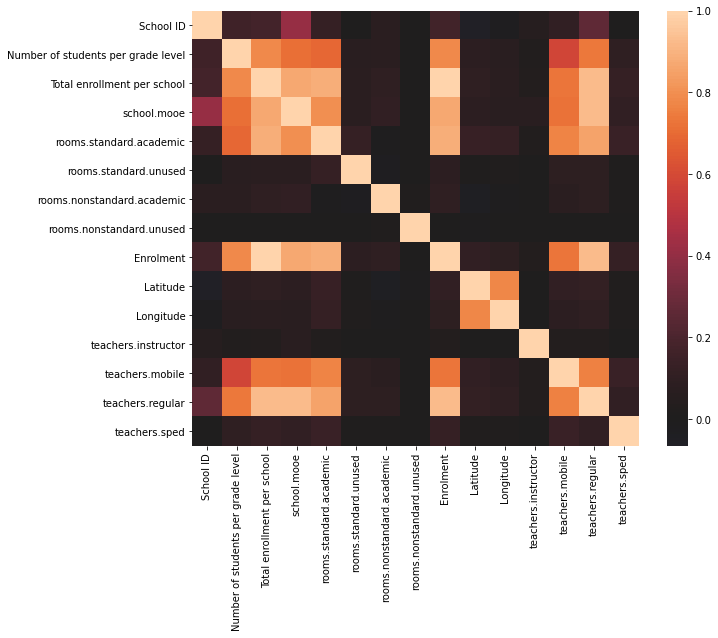

In [88]:
plt.figure(figsize=(10,8))

sns.heatmap(df_all.corr(), center=0.00)

plt.show()

In [89]:

df_all["total_teachers"]=df_all['teachers.instructor']+ df_all['teachers.mobile']\
+df_all['teachers.regular']+df_all['teachers.sped']


In [90]:
df_all['st_ratio'] = df_all['Enrolment'] /df_all['total_teachers']


In [91]:
df_all['st_ratio'] = df_all['st_ratio'].replace(np.inf, np.nan)
df_all['st_ratio'] = df_all['st_ratio'].replace(-np.inf, np.nan)
df_all['st_ratio']


0          45.0
1          45.0
2          45.0
3          45.0
4          45.0
           ... 
1398842     NaN
1398843     NaN
1398844     NaN
1398845     NaN
1398846     NaN
Name: st_ratio, Length: 1398847, dtype: float64

In [92]:
#df_all['st_ratio'] =df_all['st_ratio'].dropna()

In [93]:
df_all_new = df_all[df_all['st_ratio'].notna()]
df_all_new

,School ID,Grade level,Number of students per grade level,school.name_x,school.region.name,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,Name of Principal,Enrolment,Latitude,Longitude,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,total_teachers,st_ratio
0,100001.0,Kinder Male,9.0,Apaleng-Libtong ES,Ilocos Region,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,...,Jesusa G. Laeno,90.0,18.253666,120.606180,0.0,0.0,2.0,0.0,2.0,45.000000
1,100001.0,Kinder Female,7.0,Apaleng-Libtong ES,Ilocos Region,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,...,Jesusa G. Laeno,90.0,18.253666,120.606180,0.0,0.0,2.0,0.0,2.0,45.000000
2,100001.0,Grade 1 Male,7.0,Apaleng-Libtong ES,Ilocos Region,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,...,Jesusa G. Laeno,90.0,18.253666,120.606180,0.0,0.0,2.0,0.0,2.0,45.000000
3,100001.0,Grade 1 Female,2.0,Apaleng-Libtong ES,Ilocos Region,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,...,Jesusa G. Laeno,90.0,18.253666,120.606180,0.0,0.0,2.0,0.0,2.0,45.000000
4,100001.0,Grade 2 Male,7.0,Apaleng-Libtong ES,Ilocos Region,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,...,Jesusa G. Laeno,90.0,18.253666,120.606180,0.0,0.0,2.0,0.0,2.0,45.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398595,320607.0,Grade 11 Female,0.0,Agripino Manalo National HS,National Capital Region,PATEROS,Taguig,PATEROS,Pateros,1st District,...,Cecilia G. Maramag,364.0,14.544392,121.062078,0.0,0.0,11.0,0.0,11.0,33.090909
1398596,320607.0,Grade 12 Male,0.0,Agripino Manalo National HS,National Capital Region,PATEROS,Taguig,PATEROS,Pateros,1st District,...,Cecilia G. Maramag,364.0,14.544392,121.062078,0.0,0.0,11.0,0.0,11.0,33.090909
1398597,320607.0,Grade 12 Female,0.0,Agripino Manalo National HS,National Capital Region,PATEROS,Taguig,PATEROS,Pateros,1st District,...,Cecilia G. Maramag,364.0,14.544392,121.062078,0.0,0.0,11.0,0.0,11.0,33.090909
1398598,320607.0,SPED NG Male_y,0.0,Agripino Manalo National HS,National Capital Region,PATEROS,Taguig,PATEROS,Pateros,1st District,...,Cecilia G. Maramag,364.0,14.544392,121.062078,0.0,0.0,11.0,0.0,11.0,33.090909


In [94]:
df_all_new.columns

Index(['School ID', 'Grade level', 'Number of students per grade level',
       'school.name_x', 'school.region.name', 'school.cityhall',
       'school.division', 'school.citymuni', 'school.district',
       'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'Total enrollment per school', 'school.offering', 'school.mooe',
       'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused', 'School Name',
       'Region', 'Province', 'Municipality', 'Division', 'District',
       'Offering', 'Name of Principal', 'Enrolment', 'Latitude', 'Longitude',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', '

In [95]:
df_all_new.corr()


,School ID,Number of students per grade level,Total enrollment per school,school.mooe,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,Enrolment,Latitude,Longitude,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,total_teachers,st_ratio
School ID,1.000000,0.193763,0.218373,0.459474,0.169056,0.009405,0.072020,0.004072,0.212921,-0.047677,-0.007352,0.055101,0.123681,0.300419,0.008842,0.284330,0.025175
Number of students per grade level,0.193763,1.000000,0.788761,0.714057,0.697152,0.067135,0.078248,-0.001797,0.787537,0.078388,0.069679,0.027215,0.577802,0.742561,0.097533,0.741625,0.044614
Total enrollment per school,0.218373,0.788761,1.000000,0.872725,0.888176,0.077159,0.103041,-0.002661,1.000000,0.090095,0.078018,0.031767,0.729649,0.929117,0.124906,0.928443,0.085002
school.mooe,0.459474,0.714057,0.872725,1.000000,0.799919,0.074168,0.110219,-0.001362,0.872725,0.085500,0.065195,0.067250,0.726520,0.929665,0.106458,0.928001,-0.006141
rooms.standard.academic,0.169056,0.697152,0.888176,0.799919,1.000000,0.120673,-0.007467,-0.004220,0.886669,0.127760,0.116618,0.029247,0.767269,0.857796,0.136109,0.871058,-0.036663
rooms.standard.unused,0.009405,0.067135,0.077159,0.074168,0.120673,1.000000,-0.023306,0.000282,0.086320,0.014882,0.019552,-0.003816,0.089445,0.090830,0.013637,0.093272,-0.023547
rooms.nonstandard.academic,0.072020,0.078248,0.103041,0.110219,-0.007467,-0.023306,1.000000,0.020019,0.097983,-0.041016,-0.007801,0.004321,0.075427,0.096347,0.011200,0.096242,0.049874
rooms.nonstandard.unused,0.004072,-0.001797,-0.002661,-0.001362,-0.004220,0.000282,0.020019,1.000000,-0.002391,-0.007316,-0.001341,-0.000952,-0.003318,-0.002842,-0.001762,-0.003044,0.000528
Enrolment,0.212921,0.787537,1.000000,0.872725,0.886669,0.086320,0.097983,-0.002391,1.000000,0.100717,0.089827,0.031666,0.727313,0.927521,0.123853,0.927216,0.057611
Latitude,-0.047677,0.078388,0.090095,0.085500,0.127760,0.014882,-0.041016,-0.007316,0.100717,1.000000,0.766666,0.001816,0.104577,0.112331,0.022709,0.114792,-0.153696


In [110]:
df_numeric = df_all [['Number of students per grade level','Total enrollment per school','school.mooe','rooms.standard.academic','rooms.standard.unused','Enrolment','Latitude','Longitude','teachers.instructor','teachers.mobile','teachers.regular','teachers.sped','total_teachers','st_ratio']]
df_numeric

,Number of students per grade level,Total enrollment per school,school.mooe,rooms.standard.academic,rooms.standard.unused,Enrolment,Latitude,Longitude,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,total_teachers,st_ratio
0,9.0,90.0,84000.0,2.0,0.0,90.0,18.253666,120.60618,0.0,0.0,2.0,0.0,2.0,45.0
1,7.0,90.0,84000.0,2.0,0.0,90.0,18.253666,120.60618,0.0,0.0,2.0,0.0,2.0,45.0
2,7.0,90.0,84000.0,2.0,0.0,90.0,18.253666,120.60618,0.0,0.0,2.0,0.0,2.0,45.0
3,2.0,90.0,84000.0,2.0,0.0,90.0,18.253666,120.60618,0.0,0.0,2.0,0.0,2.0,45.0
4,7.0,90.0,84000.0,2.0,0.0,90.0,18.253666,120.60618,0.0,0.0,2.0,0.0,2.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398842,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398843,NaN,NaN,NaN,13.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398844,NaN,NaN,NaN,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398845,NaN,NaN,NaN,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df_numeric_1 =df_numeric.dropna()
df_numeric_1

,Number of students per grade level,Total enrollment per school,school.mooe,rooms.standard.academic,rooms.standard.unused,Enrolment,Latitude,Longitude,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,total_teachers,st_ratio
0,9.0,90.0,84000.0,2.0,0.0,90.0,18.253666,120.606180,0.0,0.0,2.0,0.0,2.0,45.000000
1,7.0,90.0,84000.0,2.0,0.0,90.0,18.253666,120.606180,0.0,0.0,2.0,0.0,2.0,45.000000
2,7.0,90.0,84000.0,2.0,0.0,90.0,18.253666,120.606180,0.0,0.0,2.0,0.0,2.0,45.000000
3,2.0,90.0,84000.0,2.0,0.0,90.0,18.253666,120.606180,0.0,0.0,2.0,0.0,2.0,45.000000
4,7.0,90.0,84000.0,2.0,0.0,90.0,18.253666,120.606180,0.0,0.0,2.0,0.0,2.0,45.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398595,0.0,364.0,434000.0,0.0,2.0,364.0,14.544392,121.062078,0.0,0.0,11.0,0.0,11.0,33.090909
1398596,0.0,364.0,434000.0,0.0,2.0,364.0,14.544392,121.062078,0.0,0.0,11.0,0.0,11.0,33.090909
1398597,0.0,364.0,434000.0,0.0,2.0,364.0,14.544392,121.062078,0.0,0.0,11.0,0.0,11.0,33.090909
1398598,0.0,364.0,434000.0,0.0,2.0,364.0,14.544392,121.062078,0.0,0.0,11.0,0.0,11.0,33.090909


In [119]:
df_numeric_1.isna().sum()

Number of students per grade level    0
Total enrollment per school           0
school.mooe                           0
rooms.standard.academic               0
rooms.standard.unused                 0
Enrolment                             0
Latitude                              0
Longitude                             0
teachers.instructor                   0
teachers.mobile                       0
teachers.regular                      0
teachers.sped                         0
total_teachers                        0
st_ratio                              0
dtype: int64

In [120]:
# Insert code here
# Removing (statistical) outliers for Amount
  
Q1 = df_numeric_1.quantile(0.05)
Q3 = df_numeric_1.quantile(0.95)
IQR = Q3 - Q1
df_numeric = (df_numeric_1[(df_numeric_1 >= Q1 - 1.5*IQR) & 
                           (df_numeric_1 <= Q3 + 1.5*IQR)])

In [121]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df_numeric_1)
x



array([[-0.4431168 , -0.68573032, -0.63103961, ...,  0.        ,
        -0.77243873,  0.45465234],
       [-0.50435592, -0.68573032, -0.63103961, ...,  0.        ,
        -0.77243873,  0.45465234],
       [-0.50435592, -0.68573032, -0.63103961, ...,  0.        ,
        -0.77243873,  0.45465234],
       ...,
       [-0.71869287, -0.01485198,  0.7882355 , ...,  0.        ,
         0.11379827, -0.36119225],
       [-0.71869287, -0.01485198,  0.7882355 , ...,  0.        ,
         0.11379827, -0.36119225],
       [-0.71869287, -0.01485198,  0.7882355 , ...,  0.        ,
         0.11379827, -0.36119225]])

In [122]:
df_updated_num = pd.DataFrame(x, columns=['Number of students per grade level','Total enrollment per school','school.mooe','rooms.standard.academic','rooms.standard.unused','Enrolment','Latitude','Longitude','teachers.instructor','teachers.mobile','teachers.regular','teachers.sped','total_teachers','st_ratio'])


In [123]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(df_updated_num)
cluster_labels = model.predict(df_updated_num) 

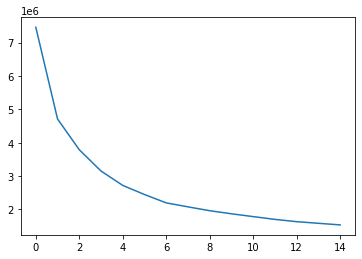

In [124]:
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = list(np.arange(1,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_updated_num)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [125]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_updated_num)
cluster_labels = kmeans.predict(df_updated_num)   

df_updated_num['Cluster_Labels'] = cluster_labels
df_updated_num['Cluster_Labels'].value_counts()

2    504382
1     62643
0     54798
Name: Cluster_Labels, dtype: int64

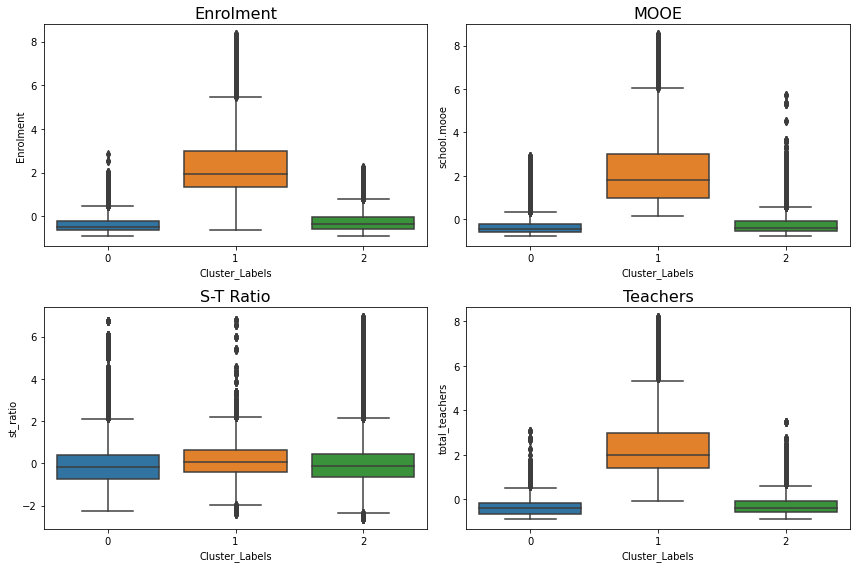

In [132]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sns.boxplot(x="Cluster_Labels", y="Enrolment", data=df_updated_num, ax=axes[0,0])
axes[0,0].set_title("Enrolment", fontsize=16)

sns.boxplot(x=df_updated_num.Cluster_Labels, y=df_updated_num["school.mooe"], ax=axes[0,1])
axes[0,1].set_title("MOOE", fontsize=16)


sns.boxplot(x=df_updated_num.Cluster_Labels, y=df_updated_num.total_teachers, ax=axes[1,1])
axes[1,1].set_title("Teachers", fontsize=16)

sns.boxplot(x=df_updated_num.Cluster_Labels, y=df_updated_num.st_ratio, ax=axes[1,0])
axes[1,0].set_title("S-T Ratio", fontsize=16)

plt.tight_layout()
plt.show();

In [126]:
df_updated_num.columns

Index(['Number of students per grade level', 'Total enrollment per school',
       'school.mooe', 'rooms.standard.academic', 'rooms.standard.unused',
       'Enrolment', 'Latitude', 'Longitude', 'teachers.instructor',
       'teachers.mobile', 'teachers.regular', 'teachers.sped',
       'total_teachers', 'st_ratio', 'Cluster_Labels'],
      dtype='object')

In [99]:
df_updated_num = pd.DataFrame(x, columns=['Number of students per grade level','Total enrollment per school','school.mooe','rooms.standard.academic','rooms.standard.unused','Enrolment','Latitude','Longitude','teachers.instructor','teachers.mobile','teachers.regular','teachers.sped','total_teachers','st_ratio'])


In [100]:
df_updated_num.corr()

,Number of students per grade level,Total enrollment per school,school.mooe,rooms.standard.academic,rooms.standard.unused,Enrolment,Latitude,Longitude,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,total_teachers,st_ratio
Number of students per grade level,1.000000,0.740298,0.666073,0.663297,0.019822,0.741264,0.075174,0.078967,NaN,0.495684,0.693080,NaN,0.692696,0.111049
Total enrollment per school,0.740298,1.000000,0.849209,0.885429,0.017967,1.000000,0.090662,0.087574,NaN,0.663647,0.920565,NaN,0.920625,0.140862
school.mooe,0.666073,0.849209,1.000000,0.781971,0.020639,0.849108,0.088617,0.076559,NaN,0.587870,0.903006,NaN,0.893328,0.021874
rooms.standard.academic,0.663297,0.885429,0.781971,1.000000,0.047419,0.883897,0.142593,0.125635,NaN,0.724850,0.875968,NaN,0.888733,-0.015044
rooms.standard.unused,0.019822,0.017967,0.020639,0.047419,1.000000,0.019214,0.010188,0.019823,NaN,0.039228,0.030951,NaN,0.031493,-0.022071
Enrolment,0.741264,1.000000,0.849108,0.883897,0.019214,1.000000,0.103322,0.102514,NaN,0.661598,0.916556,NaN,0.917103,0.118842
Latitude,0.075174,0.090662,0.088617,0.142593,0.010188,0.103322,1.000000,0.771457,NaN,0.114779,0.117001,NaN,0.121990,-0.158337
Longitude,0.078967,0.087574,0.076559,0.125635,0.019823,0.102514,0.771457,1.000000,NaN,0.094610,0.107886,NaN,0.109932,-0.074817
teachers.instructor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teachers.mobile,0.495684,0.663647,0.587870,0.724850,0.039228,0.661598,0.114779,0.094610,NaN,1.000000,0.661276,NaN,0.732175,-0.076348


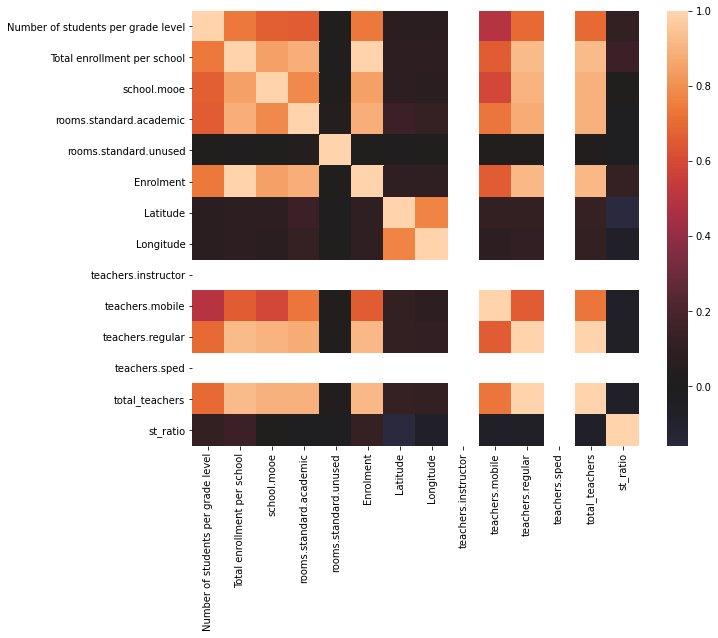

In [101]:
plt.figure(figsize=(10,8))
sns.heatmap(df_updated_num.corr(), center=0.00)
plt.show()

In [102]:
df_all.isna().sum()

School ID                                  0
Grade level                              127
Number of students per grade level    668815
school.name_x                           2903
school.region.name                      2903
school.cityhall                         2903
school.division                         2903
school.citymuni                         2903
school.district                         2903
school.legdistrict                      2903
school.type                             2903
school.abbrev                           2903
school.previousname                     2903
school.mother.id                        2903
school.address                          2903
school.established                      2903
school.classification                   2903
school.classification2                  2903
school.curricularclass                  2903
school.organization                     2903
school.cityincome                       2903
school.cityclass                        2903
school.urb

In [103]:
df_all.columns

Index(['School ID', 'Grade level', 'Number of students per grade level',
       'school.name_x', 'school.region.name', 'school.cityhall',
       'school.division', 'school.citymuni', 'school.district',
       'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.name_y',
       'Total enrollment per school', 'school.offering', 'school.mooe',
       'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused', 'School Name',
       'Region', 'Province', 'Municipality', 'Division', 'District',
       'Offering', 'Name of Principal', 'Enrolment', 'Latitude', 'Longitude',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', '

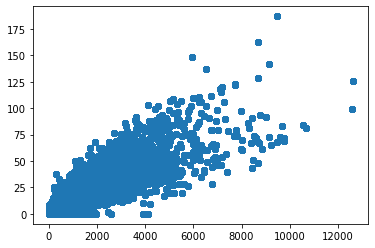

In [104]:
c = df_all['Total enrollment per school']
d = df_all['rooms.standard.academic']
plt.scatter(c, d) 
plt.show()

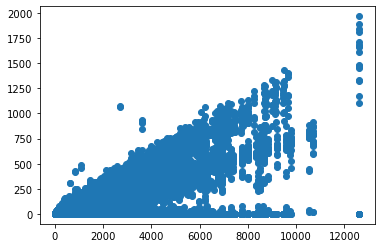

In [105]:
x = df_all['Total enrollment per school']
y = df_all['Number of students per grade level']
plt.scatter(x, y) 
plt.show()

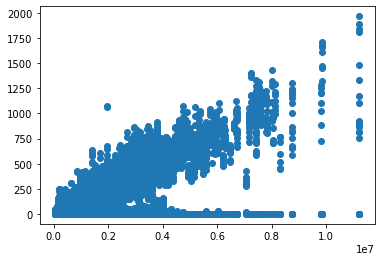

In [106]:
a = df_all['school.mooe']
b = df_all['Number of students per grade level']
plt.scatter(a, b) 
plt.show()